### Méthodes

In [1]:
def plot_univarie(df, list_col):
    """ Affiche les mesures et les histogrammes de variables numériques """
    for col in list_col:
        print("-"*70)
        print("Colonne :", col)
        # mesures de tendances centrales
        print("moyenne : ", df[col].mean())
        print("médiane : ", df[col].median())
        print("mode : ", df[col].mode())
        print("min : ", df[col].min())
        print("max : ", df[col].max())
        quartiles = [np.percentile(df[col], p) for p in [25, 75]]
        print("quartiles : ", quartiles)
        # mesures de dispersion
        print("variance : ", df[col].var(ddof=0))
        print("écart-type : ", df[col].std(ddof=0))
        print("coefficient de variation : ", df[col].std(ddof=0)/df[col].mean())
        # mesures de forme
        print("skewness : ", df[col].skew())
        print("kurtosis : ", df[col].kurtosis())
        df[col].hist(bins=25)
        plt.xlabel(col)
        # pour tracer les 1er et 3ème quartiles
        min_ylim, max_ylim = plt.ylim()
        # plt.xticks(np.arange(-15, 41, 5))
        plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
        plt.text(quartiles[0], max_ylim*0.95, ' {:.0f}'.format(quartiles[0]))
        plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
        plt.text(quartiles[1], max_ylim*0.85, ' {:.0f}'.format(quartiles[1]))
        plt.show()
        print("-"*70)

# Projet

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
from dask.distributed import Client

In [ ]:
import pandas
import random

filename = "data.csv" 
n = sum(1 for line in open(filename))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df = pandas.read_csv(filename, skiprows=skip)

import pandas as pd
chunks = pd.read_json(file, lines=True, chunksize = 100)
for c in chunks:
    print(c)

    
import json
with open('file.json') as infile:
  o = json.load(infile)
  chunkSize = 1000
  for i in xrange(0, len(o), chunkSize):
    with open('file_' + str(i//chunkSize) + '.json', 'w') as outfile:
      json.dump(o[i:i+chunkSize], outfile)



In [4]:
ddf = dd.read_json('yelp_dataset/yelp_academic_dataset_business.json',blocksize=13e7)

In [5]:
ddf = ddf.drop(columns=["address", "city", "state", "postal_code", "latitude", "longitude", "attributes", "hours", "is_open"])

In [6]:
ddf.head()

,business_id,name,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,4.5,13,"Brewpubs, Breweries, Food"


In [7]:
def show_size_dataset(df):
    print("Le dataset présente", len(df), "lignes et", df.shape[1], "colonnes.")

In [8]:
show_size_dataset(ddf)

Le dataset présente 150346 lignes et 5 colonnes.


In [9]:
data_wo_categ = ddf.loc[ddf["categories"].notnull(), :]
show_size_dataset(data_wo_categ)

Le dataset présente 150243 lignes et 5 colonnes.


In [10]:
restaurant_data = data_wo_categ.loc[data_wo_categ["categories"].str.contains("restaurant", case=False)]
show_size_dataset(restaurant_data)

Le dataset présente 52286 lignes et 5 colonnes.


In [11]:
restaurant_data = restaurant_data.drop(columns=["categories"])

In [12]:
def extract_low_rating_restaurants(df, rating=3):
    res_df = df.loc[df["stars"] < rating, :]
    print("Le dataset filtré avec un rating inférieur à", rating, "présente", len(res_df), "lignes.")

In [13]:
for rate in [1, 1.5, 2, 2.5, 3, 3.5]:
    extract_low_rating_restaurants(restaurant_data, rating=rate)

Le dataset filtré avec un rating inférieur à 1 présente 0 lignes.
Le dataset filtré avec un rating inférieur à 1.5 présente 247 lignes.
Le dataset filtré avec un rating inférieur à 2 présente 1728 lignes.
Le dataset filtré avec un rating inférieur à 2.5 présente 4639 lignes.
Le dataset filtré avec un rating inférieur à 3 présente 9489 lignes.
Le dataset filtré avec un rating inférieur à 3.5 présente 17130 lignes.


In [14]:
restaurant_data.describe().compute()

,stars,review_count
count,52286.000000,52286.000000
mean,3.515234,87.241078
std,0.829585,188.912445
min,1.000000,5.000000
25%,3.000000,13.000000
50%,3.500000,33.000000
75%,4.000000,89.000000
max,5.000000,7568.000000


----------------------------------------------------------------------
Colonne : stars
moyenne :  3.5152335233140803
médiane :  3.5
mode :  0    4.0
Name: stars, dtype: float64
min :  1.0
max :  5.0
quartiles :  [3.0, 4.0]
variance :  0.6881979210243725
écart-type :  0.8295769530455704
coefficient de variation :  0.23599483435270172
skewness :  -0.5928496967191768
kurtosis :  -0.11239981633509366


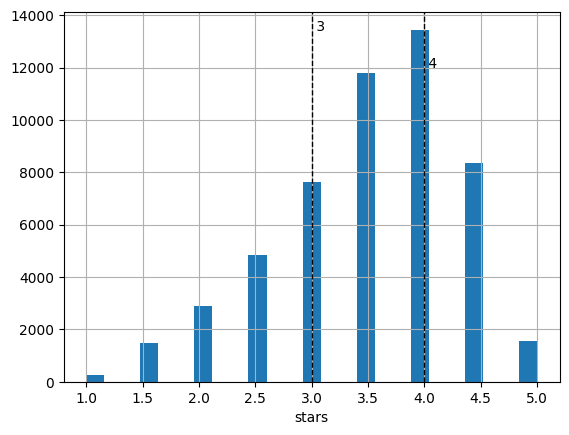

----------------------------------------------------------------------


In [15]:
plot_univarie(restaurant_data.compute(), ["stars"])

In [16]:
ddf_rev = dd.read_json('yelp_dataset/yelp_academic_dataset_review.json',blocksize=13e7)

In [17]:
ddf_rev = ddf_rev.drop(columns=["user_id", "date", "review_id"])

In [18]:
ddf_rev.head()

,business_id,stars,useful,funny,cool,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...


In [22]:
restaurant_review = ddf_rev.loc[ddf_rev["business_id"].isin(restaurant_data["business_id"].values), :]

ValueError: Cannot call len() on object with unknown chunk size.

A possible solution: https://docs.dask.org/en/latest/array-chunks.html#unknown-chunks
Summary: to compute chunks sizes, use

   x.compute_chunk_sizes()  # for Dask Array `x`
   ddf.to_dask_array(lengths=True)  # for Dask DataFrame `ddf`

In [ ]:
for rate in [1, 1.5, 2, 2.5, 3]:
    extract_low_rating_restaurants(ddf_rev, rating=rate)

In [ ]:
restaurant_data.reset_index()

In [ ]:
join = restaurant_data.merge(ddf_rev, how="inner", on="business_id")

In [ ]:
join.head()